# MNIST

In [2]:
# Training

In [13]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
mnist = tf.keras.datasets.mnist

(train_x, train_y), (test_x, test_y) = mnist.load_data()

train_x, test_x = train_x/255.0, test_x/255.0
train_x = train_x.reshape((train_x.shape[0], 28, 28, 1))
test_x = test_x.reshape((test_x.shape[0], 28, 28, 1))
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 32,
                           kernel_size = (3,3),
                           activation = 'relu',
                           padding = 'SAME',
                           input_shape = (28, 28, 1)),

    tf.keras.layers.MaxPool2D((2,2)),

    tf.keras.layers.Conv2D(filters = 64,
                           kernel_size = (3,3),
                           activation = 'relu',
                           padding = 'SAME',
                           input_shape = (14, 14, 32)),

    tf.keras.layers.MaxPool2D((2,2)),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(units = 128, activation = 'relu'),

    tf.keras.layers.Dense(units = 10, activation = 'softmax')
])
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy')
model.fit(train_x, train_y, batch_size = 50, epochs = 3)

Epoch 1/3
1200/1200 [==============================] - 6s 4ms/step - loss: 0.1424 - accuracy: 0.9553
Epoch 2/3
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0432 - accuracy: 0.9865
Epoch 3/3
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0282 - accuracy: 0.9912


## Testing or Evaluating

313/313 [==============================] - 1s 4ms/step - loss: 0.0332 - accuracy: 0.9881


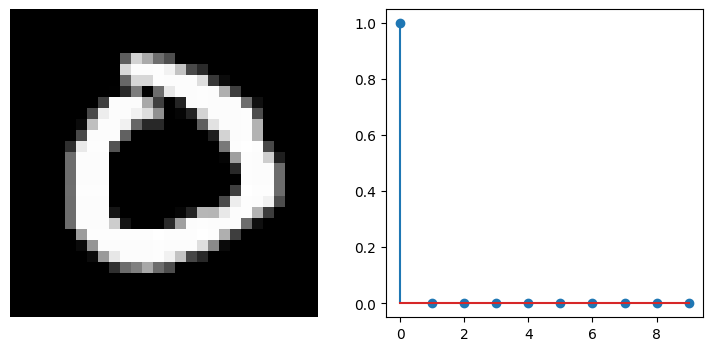

Prediction : 0


In [16]:
import random
random_num = random.randrange(0,len(test_x))

test_loss, test_acc = model.evaluate(test_x, test_y)

test_img = test_x[[random_num]]

predict = model.predict(test_img, verbose = 0)
mypred = np.argmax(predict, axis = 1)

plt.figure(figsize = (9, 4))

plt.subplot(1,2,1)
plt.imshow(test_img.reshape(28, 28), 'gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.stem(predict[0])
plt.show()

print('Prediction : {}'.format(mypred[0]))

# Steel Surface Defects

To classify defects images into 6 classes

scratches, rolled-in scale, pitted surface, patches, inclusion, crazing

## Training

In [7]:
# Change file paths if necessary

train_x = np.load('./Data/NEU_train_imgs.npy')
train_y = np.load('./Data/NEU_train_labels.npy')

test_x = np.load('./Data/NEU_test_imgs.npy')
test_y = np.load('./Data/NEU_test_labels.npy')

print(train_x.shape)
print(train_y.shape)

print(test_x.shape)
print(test_y.shape)

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 32,
                           kernel_size = (3,3),
                           activation = 'relu',
                           padding = 'SAME',
                           input_shape = (200, 200, 1)),

    tf.keras.layers.MaxPool2D((2,2)),

    tf.keras.layers.Conv2D(filters = 64,
                           kernel_size = (3,3),
                           activation = 'relu',
                           padding = 'SAME',
                           input_shape = (100, 100, 32)),

    tf.keras.layers.MaxPool2D((2,2)),

    tf.keras.layers.Conv2D(filters = 128,
                           kernel_size = (3,3),
                           activation = 'relu',
                           padding = 'SAME',
                           input_shape = (50, 50, 64)),

    tf.keras.layers.MaxPool2D((2,2)),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(units = 128, activation = 'relu'),

    tf.keras.layers.Dense(units = 6, activation = 'softmax')
])

In [9]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy')

model.fit(train_x, train_y, batch_size = 50, epochs = 10)

Epoch 1/10
30/30 [==============================] - 2s 23ms/step - loss: 2.0193 - accuracy: 0.2513
Epoch 2/10
30/30 [==============================] - 1s 24ms/step - loss: 1.1241 - accuracy: 0.5720
Epoch 3/10
30/30 [==============================] - 1s 23ms/step - loss: 0.7140 - accuracy: 0.7273
Epoch 4/10
30/30 [==============================] - 1s 22ms/step - loss: 0.4680 - accuracy: 0.8440
Epoch 5/10
30/30 [==============================] - 1s 23ms/step - loss: 0.5382 - accuracy: 0.8120
Epoch 6/10
30/30 [==============================] - 1s 23ms/step - loss: 0.6065 - accuracy: 0.7927
Epoch 7/10
30/30 [==============================] - 1s 23ms/step - loss: 0.2818 - accuracy: 0.9153
Epoch 8/10
30/30 [==============================] - 1s 23ms/step - loss: 0.2209 - accuracy: 0.9240
Epoch 9/10
30/30 [==============================] - 1s 23ms/step - loss: 0.4206 - accuracy: 0.8487
Epoch 10/10
30/30 [==============================] - 1s 22ms/step - loss: 0.3488 - accuracy: 0.8813


## Testing or Evaluating

10/10 [==============================] - 1s 11ms/step - loss: 0.2605 - accuracy: 0.8967


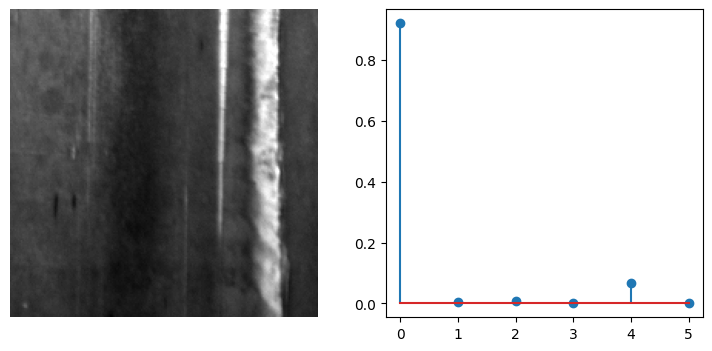

Prediction : scratches
True Label : scratches


In [10]:
test_loss, test_acc = model.evaluate(test_x, test_y)

name = ['scratches', 'rolled-in scale', 'pitted surface', 'patches', 'inclusion', 'crazing']

idx = np.random.choice(test_x.shape[0], 1)
test_img = test_x[idx]
test_label = test_y[idx]

predict = model.predict(test_img, verbose = 0)
mypred = np.argmax(predict, axis = 1)

plt.figure(figsize = (9, 4))
plt.subplot(1,2,1)
plt.imshow(test_img.reshape(200, 200), 'gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.stem(predict[0])
plt.show()

print('Prediction : {}'.format(name[mypred[0]]))
print('True Label : {}'.format(name[test_label[0]]))

# CAM(Class Activation Map)

## Import library


In [17]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [18]:
mnist = tf.keras.datasets.mnist

(train_x, train_y), (test_x, test_y) = mnist.load_data()

train_x, test_x = train_x/255.0, test_x/255.0

train_x = train_x.reshape((train_x.shape[0], 28, 28, 1))
test_x = test_x.reshape((test_x.shape[0], 28, 28, 1))

train_x, train_y = train_x[0:6000], train_y[0:6000]
test_x, test_y = test_x[0:6000], test_y[0:6000]

n_train = train_x.shape[0]
n_test = test_x.shape[0]

print ("The number of training images : {}, shape : {}".format(n_train, train_x.shape))
print ("The number of testing images : {}, shape : {}".format(n_test, test_x.shape))

The number of training images : 6000, shape : (6000, 28, 28, 1)
The number of testing images : 6000, shape : (6000, 28, 28, 1)


## Load MNIST dataset

In [19]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 32,
                          kernel_size = (3, 3),
                          activation = 'relu',
                          padding = 'SAME',
                          input_shape = (28, 28, 1)),
    tf.keras.layers.MaxPool2D((2, 2)),
    
    tf.keras.layers.Conv2D(filters = 64,
                          kernel_size = (3, 3),
                          activation = 'relu',
                          padding = 'SAME',
                          input_shape = (14, 14, 32)),
    
    tf.keras.layers.GlobalAveragePooling2D(),
    
    tf.keras.layers.Dense(units = 10, activation = 'softmax')
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 global_average_pooling2d (G  (None, 64)               0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_6 (Dense)             (None, 10)                650       
                                                                 
Total params: 19,466
Trainable params: 19,466
Non-trai

## Build an architecture

## Training

In [20]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = 'accuracy')

In [21]:
history = model.fit(train_x, train_y, batch_size = 128, epochs = 20)

Epoch 1/20
47/47 [==============================] - 1s 4ms/step - loss: 2.2845 - accuracy: 0.1240
Epoch 2/20
47/47 [==============================] - 0s 4ms/step - loss: 2.1846 - accuracy: 0.2555
Epoch 3/20
47/47 [==============================] - 0s 4ms/step - loss: 1.9476 - accuracy: 0.3363
Epoch 4/20
47/47 [==============================] - 0s 3ms/step - loss: 1.7604 - accuracy: 0.3837
Epoch 5/20
47/47 [==============================] - 0s 3ms/step - loss: 1.6368 - accuracy: 0.4428
Epoch 6/20
47/47 [==============================] - 0s 4ms/step - loss: 1.5550 - accuracy: 0.4707
Epoch 7/20
47/47 [==============================] - 0s 4ms/step - loss: 1.4896 - accuracy: 0.5085
Epoch 8/20
47/47 [==============================] - 0s 3ms/step - loss: 1.4303 - accuracy: 0.5265
Epoch 9/20
47/47 [==============================] - 0s 3ms/step - loss: 1.3877 - accuracy: 0.5390
Epoch 10/20
47/47 [==============================] - 0s 3ms/step - loss: 1.3281 - accuracy: 0.5758
Epoch 11/20
47/47 [

[2.2844927310943604, 2.1845638751983643, 1.947568655014038, 1.7603626251220703, 1.6368324756622314, 1.554963231086731, 1.489622712135315, 1.4303427934646606, 1.3876757621765137, 1.3281283378601074, 1.2818443775177002, 1.2267075777053833, 1.1832531690597534, 1.1471315622329712, 1.1065231561660767, 1.0591497421264648, 1.0345333814620972, 1.007734775543213, 0.9691262245178223, 0.9476429224014282]


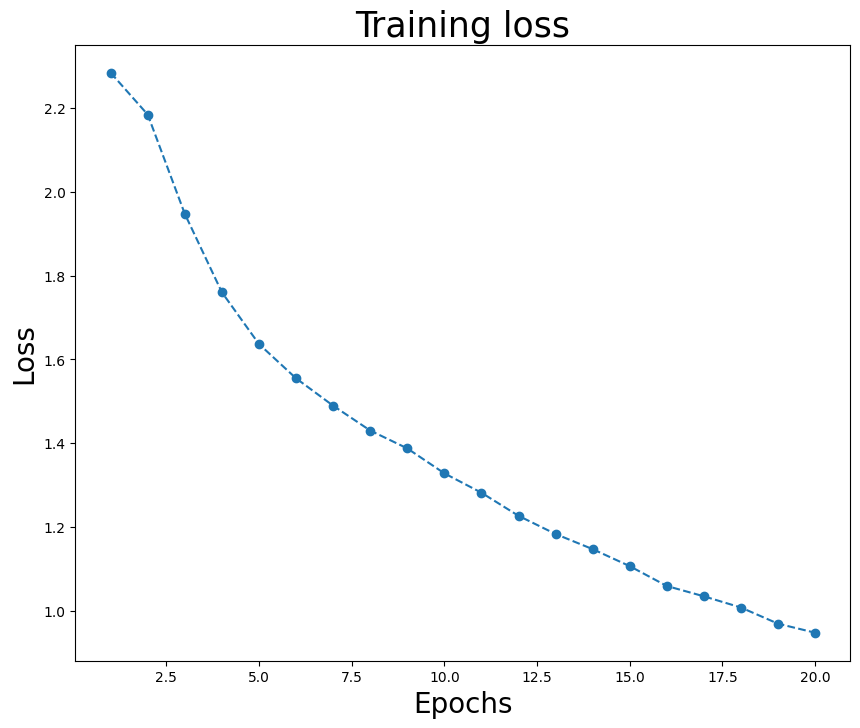

In [22]:
loss = history.history["loss"]
epochs = range(1, len(loss) + 1)
plt.figure(figsize = (10,8))
plt.plot(epochs, loss, "o--", label="Training loss")
plt.title("Training loss", fontsize = 25)
plt.xlabel("Epochs", fontsize = 20)
plt.ylabel("Loss", fontsize = 20)
# plt.savefig('Training loss.png')
print(loss)
plt.show()

[0.12399999797344208, 0.2554999887943268, 0.33633333444595337, 0.38366666436195374, 0.4428333342075348, 0.47066667675971985, 0.5084999799728394, 0.5264999866485596, 0.5389999747276306, 0.5758333206176758, 0.5945000052452087, 0.6244999766349792, 0.6321666836738586, 0.6411666870117188, 0.6671666502952576, 0.6865000128746033, 0.687833309173584, 0.6936666369438171, 0.7085000276565552, 0.7088333368301392]


<Figure size 640x480 with 0 Axes>

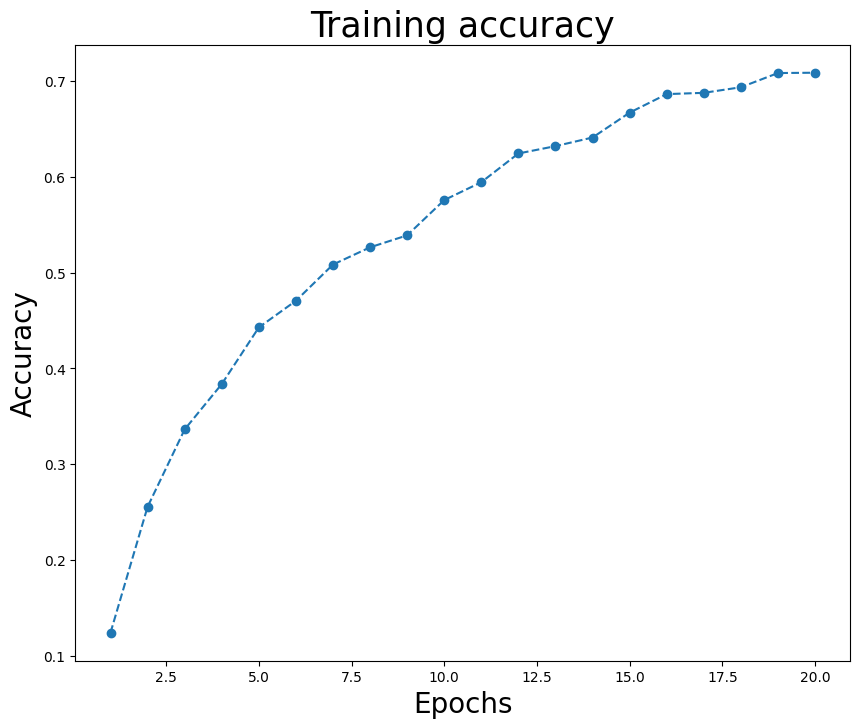

In [23]:
plt.clf()
plt.figure(figsize = (10,8))
acc = history.history["accuracy"]
plt.plot(epochs, acc, "o--", label="Training accuracy")
plt.title("Training accuracy", fontsize = 25)
plt.xlabel("Epochs", fontsize = 20)
plt.ylabel("Accuracy", fontsize = 20)
# plt.savefig('Accuracy.png')
print(acc)
plt.show()

## Test and evaluating

In [24]:
# accuracy test
test_loss, test_acc = model.evaluate(test_x, test_y)

188/188 [==============================] - 1s 3ms/step - loss: 0.9713 - accuracy: 0.6895


## Review CAM data

In [25]:
## Define the CAM
# get max pooling layer and fully connected layer 
conv_layer = model.get_layer(index = 2)
fc_layer = model.layers[4].get_weights()[0]

# Class activation map 
my_map = tf.matmul(conv_layer.output, fc_layer)
CAM = tf.keras.Model(inputs = model.inputs, outputs = my_map)

1/1 [==============================] - 0s 18ms/step


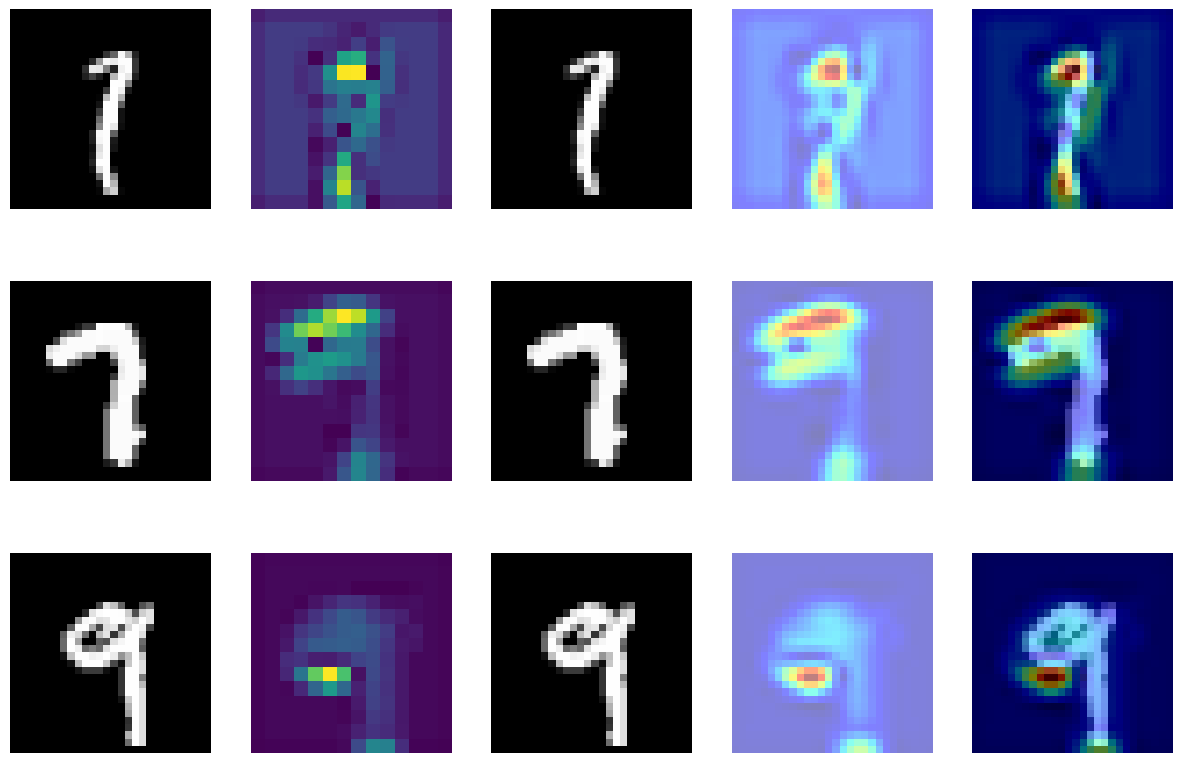

In [26]:
## Compare the CAM data from input of 1, 7 and 9
# Select indices of test data of 1, 7 and 9
list_1 = []
list_7 = []
list_9 = []
for i in range(1000):
    if test_y[i] == 1:
        list_1.append(i)
    if test_y[i] == 7:
        list_7.append(i)
    if test_y[i] == 9:
        list_9.append(i)

## Create CAM data for "1"
test_idx_1 = [list_1[np.random.randint(0, 90)]]
test_image_1 = test_x[test_idx_1]
pred_1 = np.argmax(model.predict(test_image_1), axis = 1)
predCAM_1 = CAM.predict(test_image_1)

attention_1 = predCAM_1[:,:,:,pred_1]
attention_1 = np.abs(np.reshape(attention_1,(14,14)))

resized_attention_1 = cv2.resize(attention_1,
                                 (28, 28), 
                                 interpolation = cv2.INTER_CUBIC)

resized_test_x_1 = cv2.resize(test_image_1.reshape(28,28), 
                              (28, 28),
                              interpolation = cv2.INTER_CUBIC)

## Create CAM data for "7"
test_idx_2 = [list_7[np.random.randint(0, 90)]]
test_image_2 = test_x[test_idx_2]

pred_2 = np.argmax(model.predict(test_image_2), axis = 1)
predCAM_2 = CAM.predict(test_image_2)

attention_2 = predCAM_2[:,:,:,pred_2]
attention_2 = np.abs(np.reshape(attention_2,(14,14)))

resized_attention_2 = cv2.resize(attention_2,
                                 (28, 28), 
                                 interpolation = cv2.INTER_CUBIC)

resized_test_x_2 = cv2.resize(test_image_2.reshape(28,28), 
                              (28, 28),
                              interpolation = cv2.INTER_CUBIC)

## Create CAM data for "9"
test_idx_3 = [list_9[np.random.randint(0, 90)]]
test_image_3 = test_x[test_idx_3]

pred_3 = np.argmax(model.predict(test_image_3), axis = 1)
predCAM_3 = CAM.predict(test_image_3)

attention_3 = predCAM_3[:,:,:,pred_3]
attention_3 = np.abs(np.reshape(attention_3,(14,14)))

resized_attention_3 = cv2.resize(attention_3,
                                 (28, 28), 
                                 interpolation = cv2.INTER_CUBIC)

resized_test_x_3 = cv2.resize(test_image_3.reshape(28,28), 
                              (28, 28),
                              interpolation = cv2.INTER_CUBIC)
# Plot
plt.figure(figsize = (15,10))
plt.subplot(3,5,1)
plt.imshow(test_x[test_idx_1].reshape(28,28), 'gray')
plt.axis('off')
plt.subplot(3,5,2)
plt.imshow(attention_1)
plt.axis('off')
plt.subplot(3,5,3)
plt.imshow(resized_test_x_1, 'gray')
plt.axis('off')
plt.subplot(3,5,4)
plt.imshow(resized_attention_1, 'jet', alpha = 0.5)
plt.axis('off')
plt.subplot(3,5,5)
plt.imshow(resized_test_x_1, 'gray')
plt.imshow(resized_attention_1, 'jet', alpha = 0.5)
plt.axis('off')

plt.subplot(3,5,6)
plt.imshow(test_x[test_idx_2].reshape(28,28), 'gray')
plt.axis('off')
plt.subplot(3,5,7)
plt.imshow(attention_2)
plt.axis('off')
plt.subplot(3,5,8)
plt.imshow(resized_test_x_2, 'gray')
plt.axis('off')
plt.subplot(3,5,9)
plt.imshow(resized_attention_2, 'jet', alpha = 0.5)
plt.axis('off')
plt.subplot(3,5,10)
plt.imshow(resized_test_x_2, 'gray')
plt.imshow(resized_attention_2, 'jet', alpha = 0.5)
plt.axis('off')

plt.subplot(3,5,11)
plt.imshow(test_x[test_idx_3].reshape(28,28), 'gray')
plt.axis('off')
plt.subplot(3,5,12)
plt.imshow(attention_3)
plt.axis('off')
plt.subplot(3,5,13)
plt.imshow(resized_test_x_3, 'gray')
plt.axis('off')
plt.subplot(3,5,14)
plt.imshow(resized_attention_3, 'jet', alpha = 0.5)
plt.axis('off')
plt.subplot(3,5,15)
plt.imshow(resized_test_x_3, 'gray')
plt.imshow(resized_attention_3, 'jet', alpha = 0.5)
plt.axis('off')
plt.show()

## Appendix: output images from convolutional layer

### Outputs of the first convolutional layer

1/1 [==============================] - 0s 69ms/step


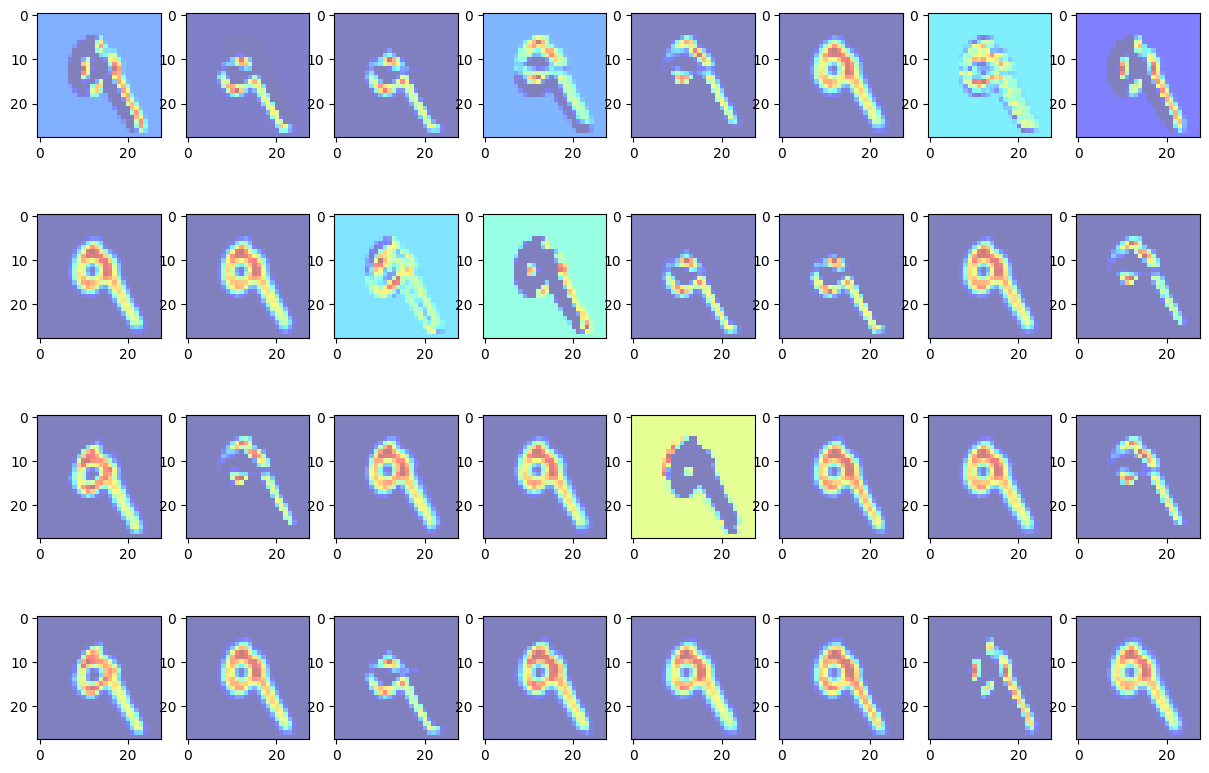

In [27]:
conv_layer = model.get_layer(index = 0)
conv_layer = conv_layer.output
my_output = tf.keras.Model(inputs = model.inputs, outputs = conv_layer)

test_idx = [7]
test_image = test_x[test_idx]

pred = np.argmax(model.predict(test_image), axis = 1)
predy = my_output.predict(test_image)

plt.figure(figsize = (15, 10))
for i in range(32):
    plt.subplot(4, 8, i+1)
    plt.imshow(predy[0, :, :, i], 'jet', alpha = 0.5)

### Outputs of the first pooling layer

In [ ]:
conv_layer = model.get_layer(index = 1)
conv_layer = conv_layer.output
my_output = tf.keras.Model(inputs = model.inputs, outputs = conv_layer)

test_idx = [7]
test_image = test_x[test_idx]

pred = np.argmax(model.predict(test_image), axis = 1)
predy = my_output.predict(test_image)

plt.figure(figsize = (15, 10))
for i in range(32):
    plt.subplot(4, 8, i+1)
    plt.imshow(predy[0, :, :, i], 'jet', alpha = 0.5)

### Outputs of the second convolutional layer

In [ ]:
conv_layer = model.get_layer(index = 2)
conv_layer = conv_layer.output
my_output = tf.keras.Model(inputs = model.inputs, outputs = conv_layer)

test_idx = [7]
test_image = test_x[test_idx]

pred = np.argmax(model.predict(test_image), axis = 1)
predy = my_output.predict(test_image)

plt.figure(figsize = (15, 15))
for i in range(64):
    plt.subplot(8, 8, i+1)
    plt.imshow(predy[0, :, :, i])
    plt.imshow(predy[0, :, :, i], 'jet', alpha = 0.5)

### Outputs of the GAP layer

In [ ]:
conv_layer = model.get_layer(index = 3)
conv_layer = conv_layer.output
my_output = tf.keras.Model(inputs = model.inputs, outputs = conv_layer)

test_idx = [7]
test_image = test_x[test_idx]

pred = np.argmax(model.predict(test_image), axis = 1)
predy = my_output.predict(test_image)
plt.figure(figsize = (15, 5))
plt.stem(predy[0, :])
print(predy)

## Weights values

In [ ]:
w = model.get_weights()
plt.figure(figsize = (15, 5))
plt.imshow(w[4].T)

### Classification results

In [ ]:
conv_layer = model.get_layer(index = 4)
conv_layer = conv_layer.output
my_output = tf.keras.Model(inputs = model.inputs, outputs = conv_layer)

test_idx = [7]
test_image = test_x[test_idx]

pred = np.argmax(model.predict(test_image), axis = 1)
predy = my_output.predict(test_image)
print(type(my_output))
plt.figure(figsize = (15, 5))
plt.stem(predy[0, :])
print(predy)